### 1. Introduction
BioCRNpyler is a software tool designed to rapidly compile large biological chemical reaction networks (CRNs) from simple user specifications (written in python). It has built in support of a number of models for transcription, translation, and gene expression regulation using components common in _E. coli_ synthetic biology. This tutorial explains the inner workings of BioCRNpyler and shows how to create custom mixtures, components, and mechanisms. Specifically, we will go through making a custom gene expression model:
<br>
>$G \to G + P \rightleftharpoons G:P \to G + P + X$

here $G$ is a gene and $P$ is a polymerase and $X$ is the protein expressed by $G$. No translational machinery is included in this model, making it one of the simplest possible for expression. Note that we are ignoring translation for simplicitiy, not becuase it isn't important.

At the user level, BioCRNplyer provides a CRNLab class that can be used to create a reaction mixture system with - 
* extract, a buffer, and other desired "extracts"
* DNA components
* specify volume of each extract and concentrations of DNA components

After adding all components, a combined model can be obtained as an SBML model object that can be simulated using your simulator of choice. 

For more details on how BioCRNpyler works, refer to the Developer Overview notebook.

Species = protein_RNAP, protein_Ribo, protein_RNAase, complex_dna_G1_protein_RNAP, rna_G1, complex_rna_G1_protein_RNAase, complex_rna_G1_protein_Ribo, dna_G1, protein_GFP
Reactions = [
	dna_G1 + protein_RNAP <--> complex_dna_G1_protein_RNAP        massaction: k_f=100.0	k_r=10.0
	complex_dna_G1_protein_RNAP --> dna_G1 + rna_G1 + protein_RNAP        massaction: k_f=3.0
	rna_G1 + protein_Ribo <--> complex_rna_G1_protein_Ribo        massaction: k_f=100.0	k_r=10.0
	complex_rna_G1_protein_Ribo --> rna_G1 + protein_GFP + protein_Ribo        massaction: k_f=2.0
	rna_G1 + protein_RNAase <--> complex_rna_G1_protein_RNAase        massaction: k_f=100.0	k_r=10.0
	complex_rna_G1_protein_RNAase --> protein_RNAase        massaction: k_f=1.0
]


c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\biocrnpyler-0.1-py3.6.egg\biocrnpyler\chemical_reaction_network.py:512: UserWarning: Warning! parameter k_local_r0_1_0 does not show up in any currently defined reactions or rules.
  m = bioscrape.types.read_model_from_sbml(filename)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\biocrnpyler-0.1-py3.6.egg\biocrnpyler\chemical_reaction_network.py:512: UserWarning: Warning! parameter k_local_r2_0 does not show up in any currently defined reactions or rules.
  m = bioscrape.types.read_model_from_sbml(filename)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\biocrnpyler-0.1-py3.6.egg\biocrnpyler\chemical_reaction_network.py:512: UserWarning: Warning! parameter k_local_r4_0 does not show up in any currently defined reactions or rules.
  m = bioscrape.types.read_model_from_sbml(filename)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\biocrnpyler-0.

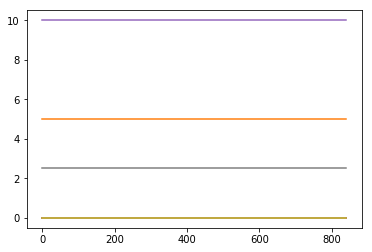

In [2]:
%matplotlib inline

from biocrnpyler import *
import numpy as np

txtl = CRNLab("GFP")

txtl.mixture("mixture1", extract = "test_extract", extract_volume = 1e-6)

# Or simply add a new dna in one line as follows.
txtl.add_dna(name = "G1", promoter = "pBest", rbs = "BCD2", protein = "GFP", initial_conc = 10, volume = 1e-7)

# Combine all of the tubes together to get the model
well1 = txtl.get_model()
print(well1)
# Create an SBML file containing the model
filename = "geneexpr.xml"
txtl.write_sbml_file(filename)

# Run a simulation (using bioscrape) and plot the result
# (Optional) Specify the type of simulation (deterministic or stochastic)
timepoints = np.linspace(0,14*60,100)
simdata = well1.runsim_bioscrape(timepoints, filename, simtype = "stochastic", plot_show = True)

### You can create your own custom mechanisms, components, or mixtures. Refer to the advanced "Developer Overview" notebook for more details